In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Forecast-Wind/data/Solar Power Plant Data.csv')

# EDA

## Features of the DF

Verify the data properties

In [ ]:
df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


View the type of variables

In [ ]:
df.dtypes

Date-Hour(NMT)          object
WindSpeed              float64
Sunshine                 int64
AirPressure            float64
Radiation              float64
AirTemperature         float64
RelativeAirHumidity      int64
SystemProduction       float64
dtype: object

See other DF properties

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


See whether or not is null values

In [ ]:
df.isna().sum()

Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

Transform Date-Hour variable into datetime object

In [ ]:
df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'])

In [ ]:
df = df.rename(columns={'Date-Hour(NMT)': 'Date'})

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = df.set_index('Date')

In [ ]:
df = df.sort_values(by = 'Date', ascending = False)

In [ ]:
df

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
Date,,,,,,,
2017-12-31 23:00:00,2.4,0,985.6,-5.9,0.4,96,0.0
2017-12-31 22:00:00,2.2,0,986.0,-5.4,0.3,92,0.0
2017-12-31 21:00:00,1.8,0,986.7,-5.3,0.2,93,0.0
2017-12-31 20:00:00,2.1,0,987.3,-5.0,-0.3,95,0.0
2017-12-31 19:00:00,4.1,0,988.2,-4.8,-0.7,94,0.0
...,...,...,...,...,...,...,...
2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0
2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0


## Time-series hourly time period

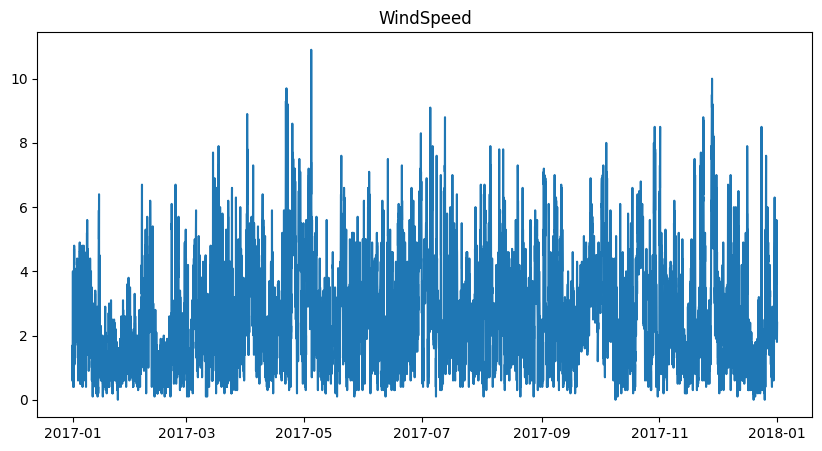

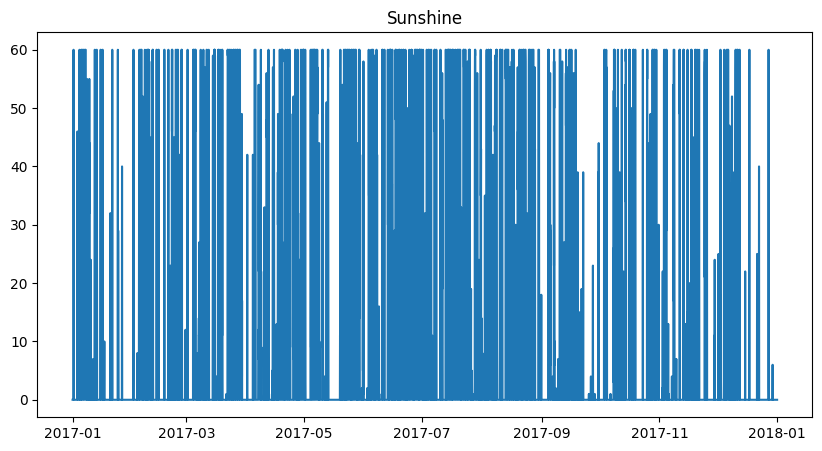

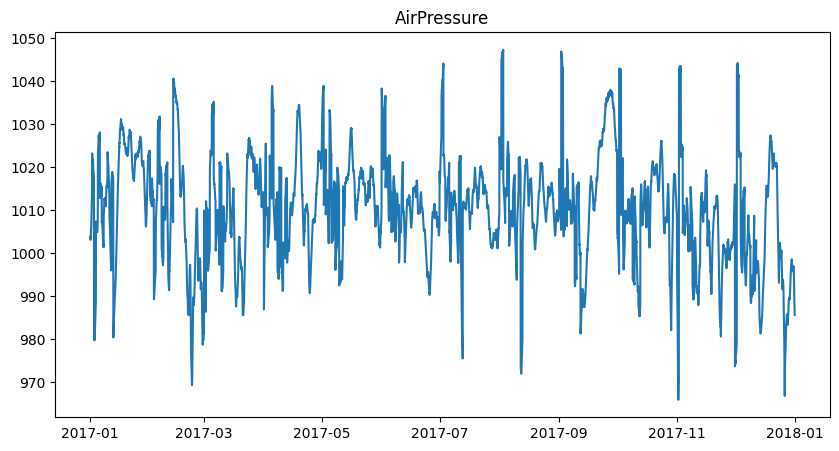

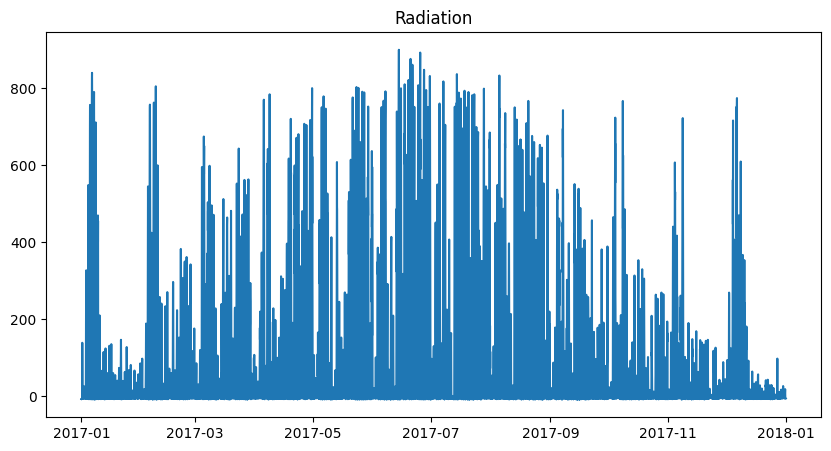

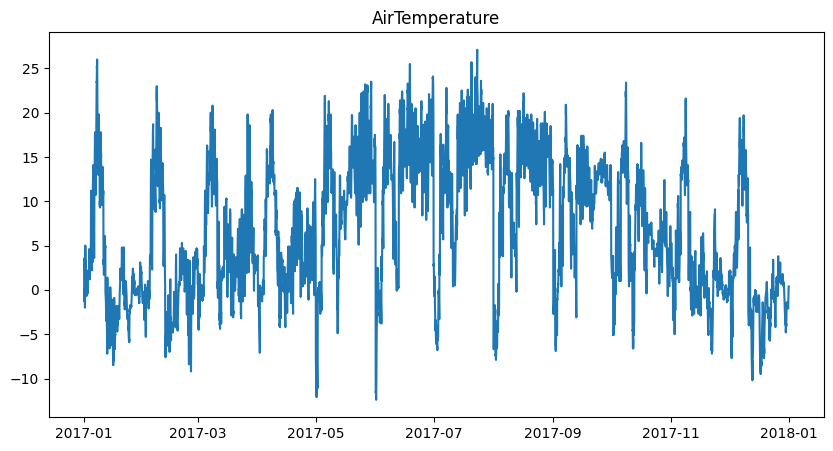

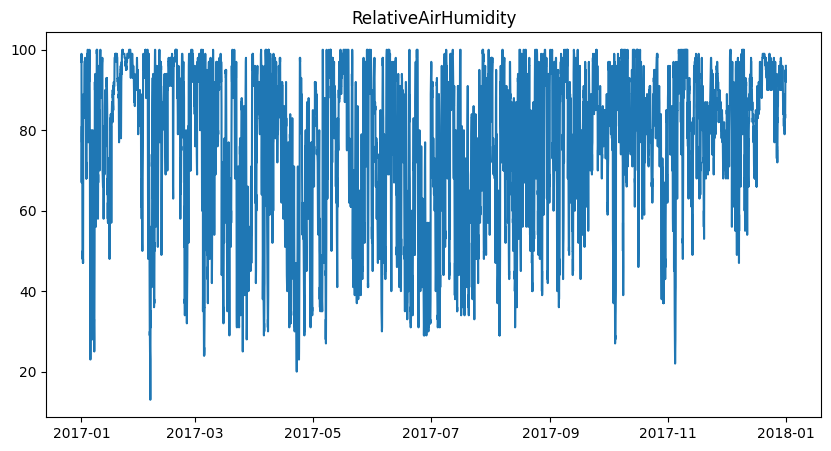

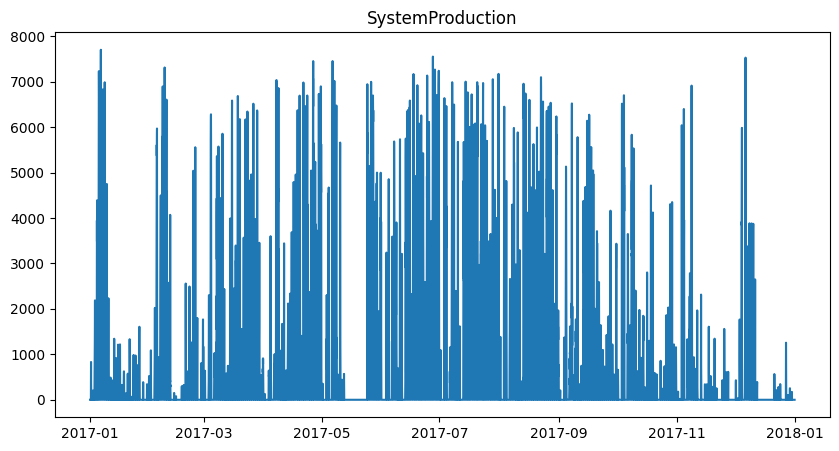

In [ ]:
cols = list(df.columns)
for col in cols:
    plt.figure(figsize=(10,5))
    plt.plot(df[col])
    plt.title(col)

## Time-series daily time period

Data is going to be zipped to days frequency

In [ ]:
df.columns

Index(['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature',
       'RelativeAirHumidity', 'SystemProduction'],
      dtype='object')

In [ ]:
df_d = df.resample('W').agg({'SystemProduction': 'sum', 'WindSpeed': 'mean', 'Sunshine': 'mean',
                             'AirPressure': 'mean', 'AirTemperature': 'mean', 'RelativeAirHumidity': 'mean',
                             'Radiation': 'mean'})

In [ ]:
df_d.head()

,SystemProduction,WindSpeed,Sunshine,AirPressure,AirTemperature,RelativeAirHumidity,Radiation
Date,,,,,,,
2017-01-01 00:00:00,0.0000,1.325,0.0,1003.500,-0.650,98.25,-7.175
2017-01-01 04:00:00,0.0000,2.025,0.0,1003.450,1.150,75.25,-6.775
2017-01-01 08:00:00,215.8333,0.675,11.5,1005.025,-1.275,78.00,8.950
2017-01-01 12:00:00,1583.3750,2.075,50.0,1006.575,3.575,58.75,92.600
2017-01-01 16:00:00,0.0000,3.800,4.0,1009.700,3.250,48.75,-5.150


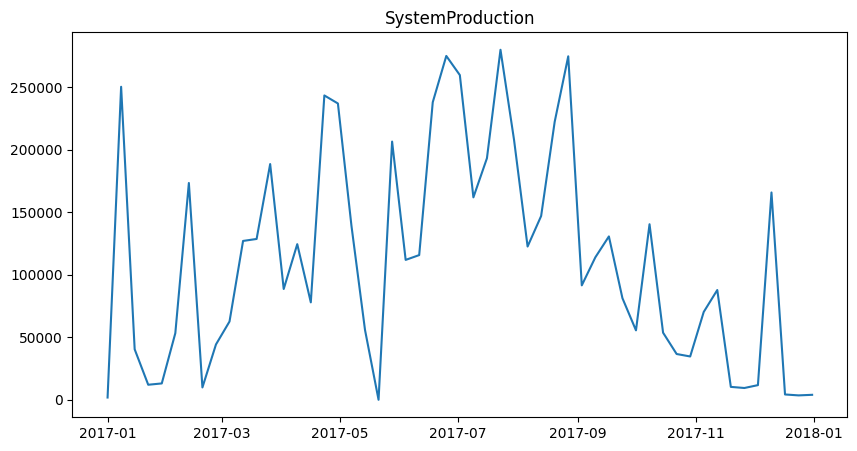

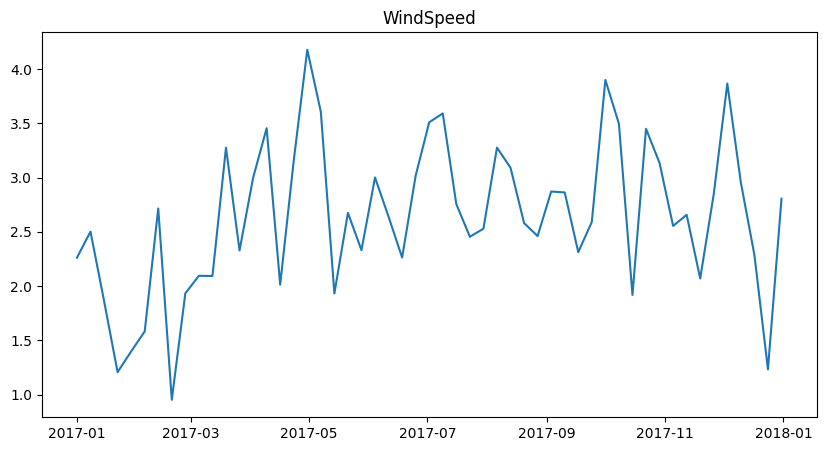

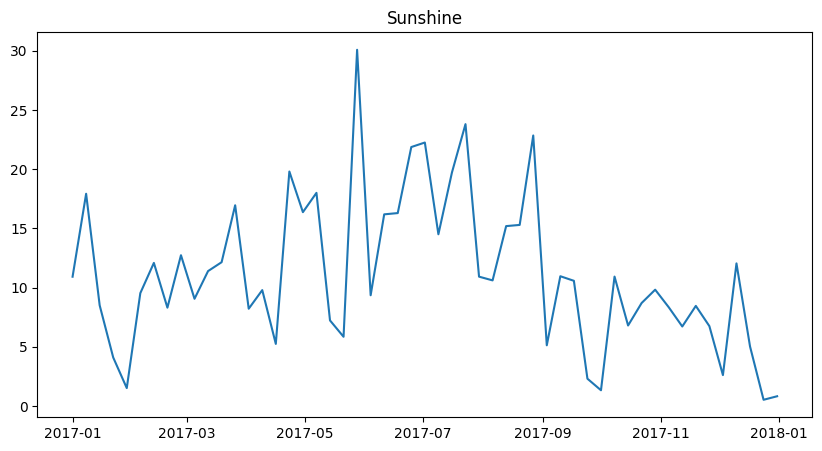

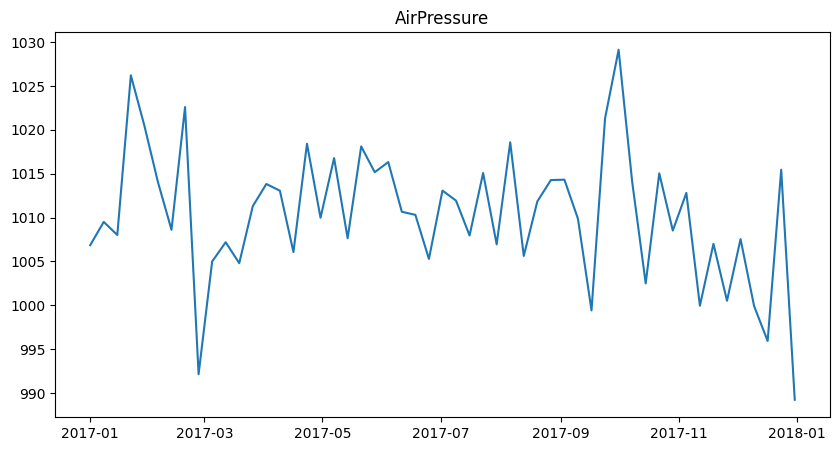

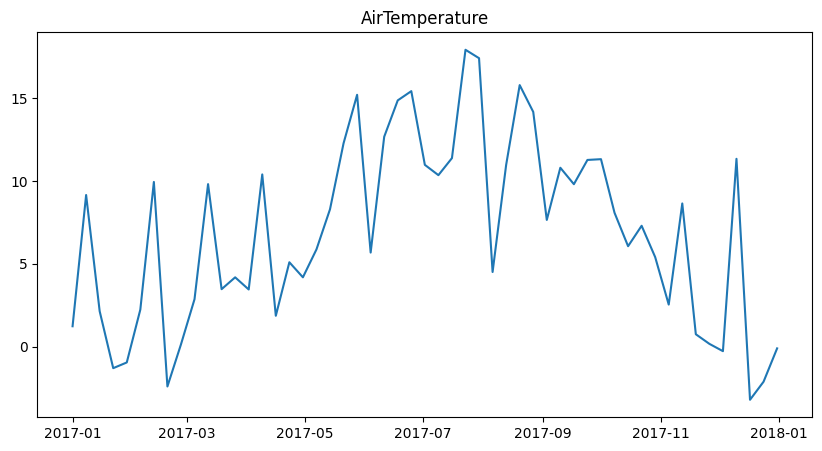

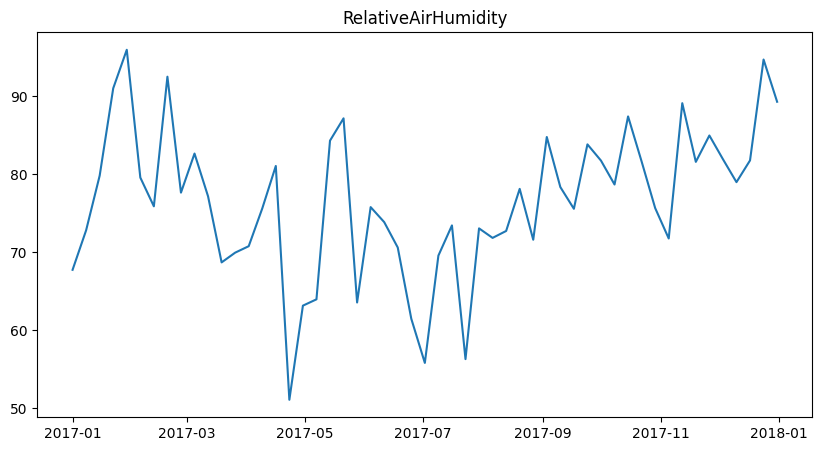

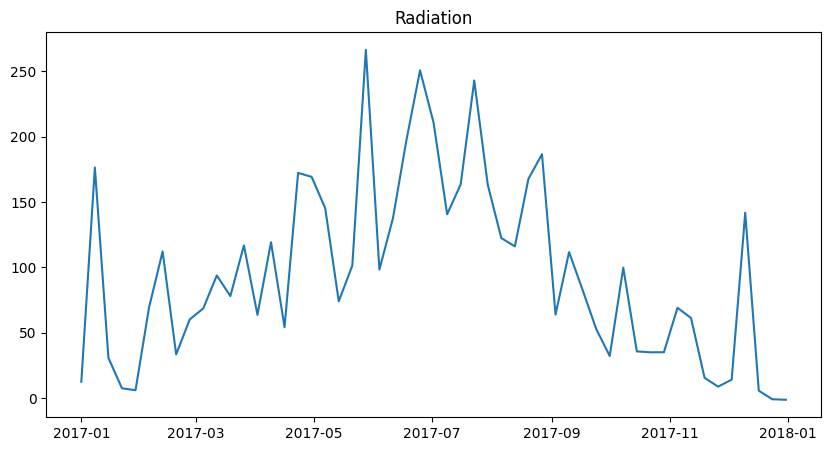

In [ ]:
for col in list(df_d.columns):
    plt.figure(figsize=(10,5))
    plt.plot(df_d[col])
    plt.title(col)

## Time series decomposition

Based on the previous results, making the forecast at daily level causes to miss information. However, per hour is too much information to deal with. Thus, it is going to be done the prediction for 4H time period.

This decision is done cause at some hours during the same day, the system cannnot produce energy (e.g. during the night).

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(df['SystemProduction'].resample('4H').sum(), model='additive')

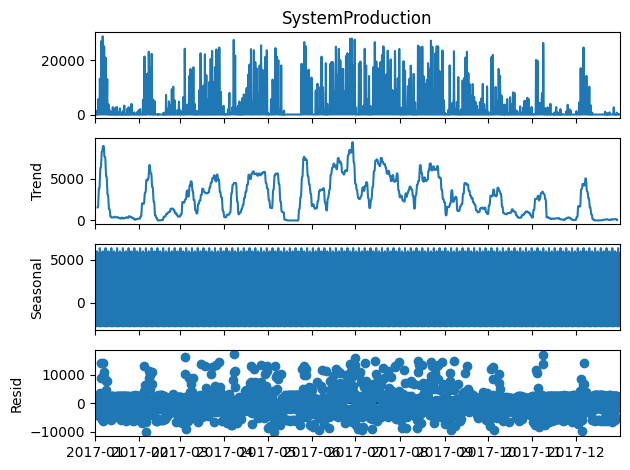

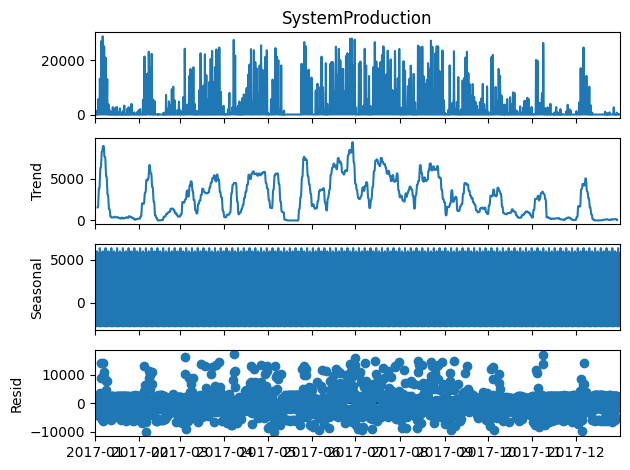

In [ ]:
result.plot()

Verify the Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Aplicar la prueba ADF
result = adfuller(df['SystemProduction'].resample('4H').sum())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.589657
p-value: 0.000001
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The previous result shows that the time series is stationary. However, in this work, it was not going to be used ARIMA models.

Making this test was only done, to see the behaviour of the time series data.

# Data Wrangling

1. Data is going to be zipped for each 4 hours time-step.

In [ ]:
df_h = df.resample('24H').agg({'SystemProduction': 'sum', 'WindSpeed': 'mean', 'Sunshine': 'mean',
                             'AirPressure': 'mean', 'AirTemperature': 'mean', 'RelativeAirHumidity': 'mean',
                             'Radiation': 'mean'})

## Linear correlation

<Axes: >

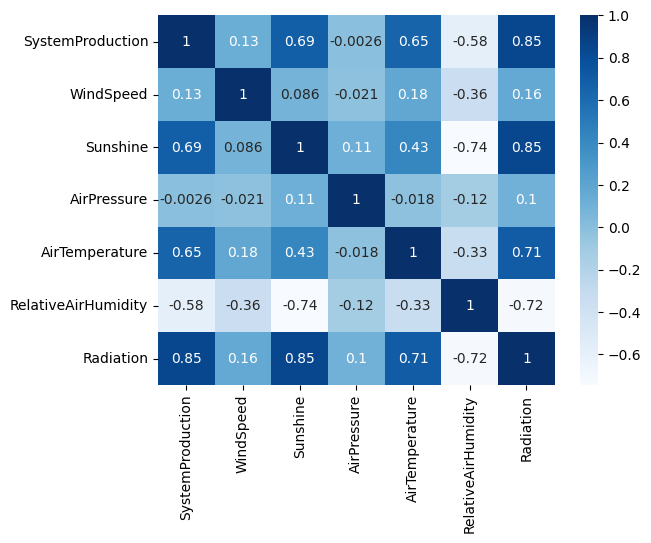

In [ ]:
sns.heatmap(df_h.corr(), cmap = 'Blues', annot  = True)

## Phik correlation

interval columns not set, guessing: ['SystemProduction', 'WindSpeed', 'Sunshine', 'AirPressure', 'AirTemperature', 'RelativeAirHumidity', 'Radiation']


<Axes: >

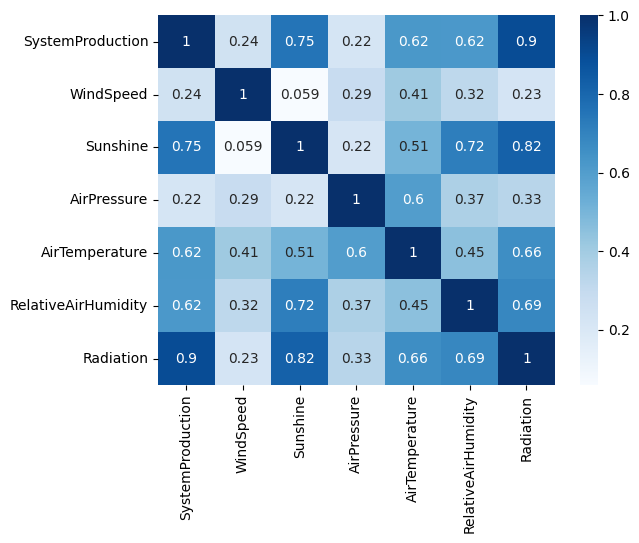

In [ ]:
sns.heatmap(df_h.phik_matrix(), cmap = 'Blues', annot  = True)

The  previous results shows that the variables "Sunshine", "AirTemperature", "RelativeAirHumidity", and "Radiation" are really important for the prediction of the system energy production.

Therefore, based on this information, it is going to be carried out a multivariate time series modeling. The goal is to train a model which is able to predict future values of the energy production.

In addition to the previous plots, it is going to see how this variables changes over the time.

Text(0.5, 1.0, 'Sunshine')

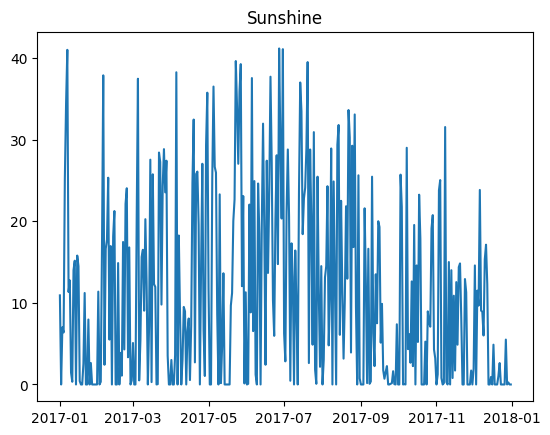

In [ ]:
plt.plot(df_h['Sunshine'])
plt.title('Sunshine')

Text(0.5, 1.0, 'AirTemperature')

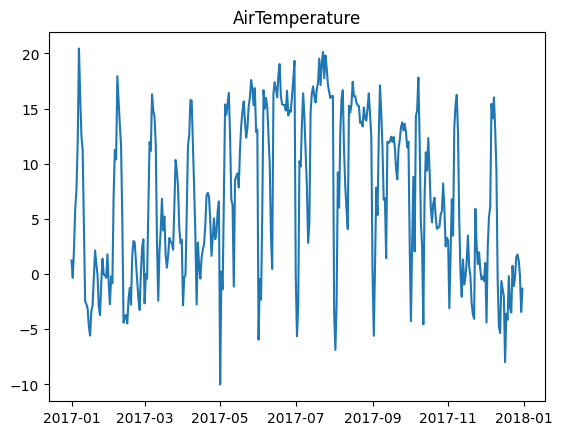

In [ ]:
plt.plot(df_h['AirTemperature'])
plt.title('AirTemperature')

Text(0.5, 1.0, 'RelativeAirHumidity')

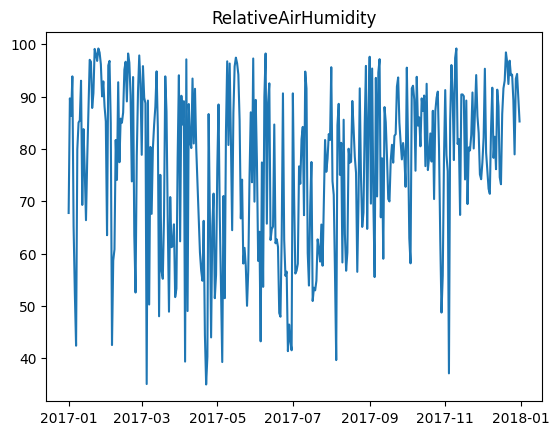

In [ ]:
plt.plot(df_h['RelativeAirHumidity'])
plt.title('RelativeAirHumidity')

Text(0.5, 1.0, 'Radiation')

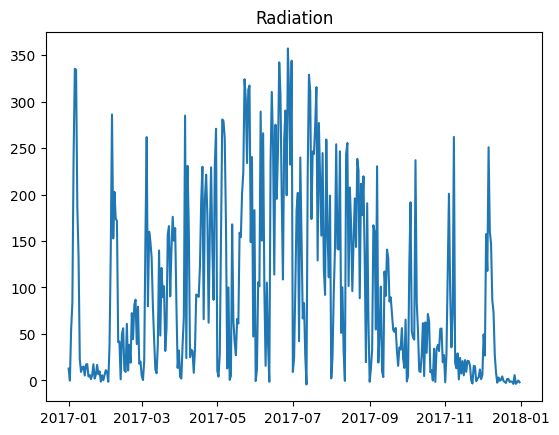

In [ ]:
plt.plot(df_h['Radiation'])
plt.title('Radiation')

# Modeling as Multivariate Forecasting

## Prophet

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
data_p = df_h[['SystemProduction', 'Sunshine', 'AirTemperature', 'RelativeAirHumidity', 'Radiation']]

In [ ]:
data_p = data_p.reset_index().rename(columns = {'Date': 'ds', 'SystemProduction' : 'y'})

Split data for train and test

In [ ]:
data_p.shape

(365, 6)

In [ ]:
n = int(len(data_p)*0.8)
train = data_p[:n]
test = data_p[n:]

Define the model

In [ ]:
model = Prophet()
model.add_regressor('Sunshine')
model.add_regressor('AirTemperature')
model.add_regressor('RelativeAirHumidity')
model.add_regressor('Radiation')

Train the model

In [ ]:
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/bs3jgqv6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/nc5j1swo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74393', 'data', 'file=/tmp/tmpg74n3tuy/bs3jgqv6.json', 'init=/tmp/tmpg74n3tuy/nc5j1swo.json', 'output', 'file=/tmp/tmpg74n3tuy/prophet_modelrqb65qgk/prophet_model-20231119155941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(test.drop(['y'], axis = 1))

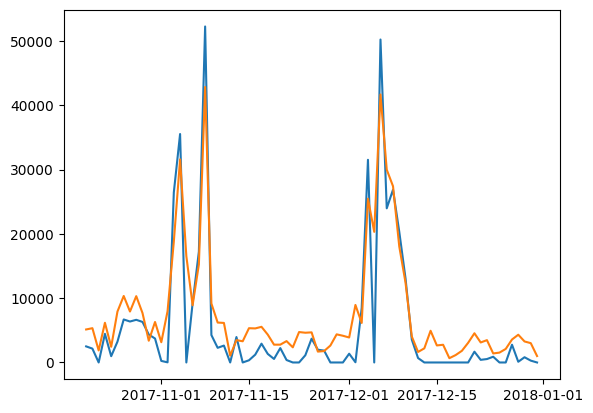

In [ ]:
plt.plot(forecast['ds'], test['y'])
plt.plot(forecast['ds'], forecast['yhat'])

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
print(mae(test['y'], forecast['yhat']))

3334.300858529772


What if select different variable for the regressor. It is going to be created a function to test it.

In [ ]:
def create_prophet_models(columns_to_predict, train_df, test_df):
  model = Prophet()
  for col in columns_to_predict:
    model.add_regressor(col)
  model.fit(train_df)
  forecast = model.predict(test_df.drop(['y'], axis = 1))
  score = mae(test_df['y'], forecast['yhat'])
  print('')
  print(columns_to_predict)
  print('***********************')
  print(score)
  print('***********************')

In [ ]:
cols_use = [['Sunshine', 'AirTemperature', 'RelativeAirHumidity', 'Radiation'],
            ['Sunshine', 'AirTemperature', 'RelativeAirHumidity'],
             ['Sunshine'],
             ['AirTemperature'],
            ['RelativeAirHumidity', 'Radiation'],
            ['Sunshine',  'Radiation'],
            ['Radiation'],
            ['AirTemperature', 'RelativeAirHumidity']]

In [ ]:
for comb in cols_use:
  create_prophet_models(comb, train, test)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/tp01yy3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/17e8027s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86523', 'data', 'file=/tmp/tmpg74n3tuy/tp01yy3z.json', 'init=/tmp/tmpg74n3tuy/17e8027s.json', 'output', 'file=/tmp/tmpg74n3tuy/prophet_model9j01fen1/prophet_model-20231119155941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit


['Sunshine', 'AirTemperature', 'RelativeAirHumidity', 'Radiation']
***********************
3334.300858529772
***********************

['Sunshine', 'AirTemperature', 'RelativeAirHumidity']
***********************
5065.993139671787
***********************


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/piruy70x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/fzxm4xpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=437', 'data', 'file=/tmp/tmpg74n3tuy/piruy70x.json', 'init=/tmp/tmpg74n3tuy/fzxm4xpi.json', 'output', 'file=/tmp/tmpg74n3tuy/prophet_modelja7i0oqy/prophet_model-20231119155942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality.


['Sunshine']
***********************
12741.52860290076
***********************

['AirTemperature']
***********************
5868.535637177201
***********************


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/mr2366x_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/u7_oskou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90238', 'data', 'file=/tmp/tmpg74n3tuy/mr2366x_.json', 'init=/tmp/tmpg74n3tuy/u7_oskou.json', 'output', 'file=/tmp/tmpg74n3tuy/prophet_modeli3pkjkkc/prophet_model-20231119155942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality


['RelativeAirHumidity', 'Radiation']
***********************
3858.242977810309
***********************

['Sunshine', 'Radiation']
***********************
3715.9379128048918
***********************


DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/_hlyxf3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/ex9911y2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92828', 'data', 'file=/tmp/tmpg74n3tuy/_hlyxf3d.json', 'init=/tmp/tmpg74n3tuy/ex9911y2.json', 'output', 'file=/tmp/tmpg74n3tuy/prophet_modelw31k4eo8/prophet_model-20231119155942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp


['Radiation']
***********************
4411.492779010326
***********************

['AirTemperature', 'RelativeAirHumidity']
***********************
5996.451512832035
***********************


Create again a model with the best model combination

In [ ]:
train_2 = train[['ds', 'y', 'Sunshine', 'Radiation']]
test_2 = test[['ds', 'y', 'Sunshine', 'Radiation']]

Define the model

In [ ]:
model2 = Prophet()
model2.add_regressor('Sunshine')
model2.add_regressor('Radiation')

Train the model

In [ ]:
model2.fit(train_2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/epgq4lt0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/fq9rg9dr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67776', 'data', 'file=/tmp/tmpg74n3tuy/epgq4lt0.json', 'init=/tmp/tmpg74n3tuy/fq9rg9dr.json', 'output', 'file=/tmp/tmpg74n3tuy/prophet_modelp1qseqfg/prophet_model-20231119160203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:02:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:02:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast2 = model2.predict(test_2.drop(['y'], axis = 1))

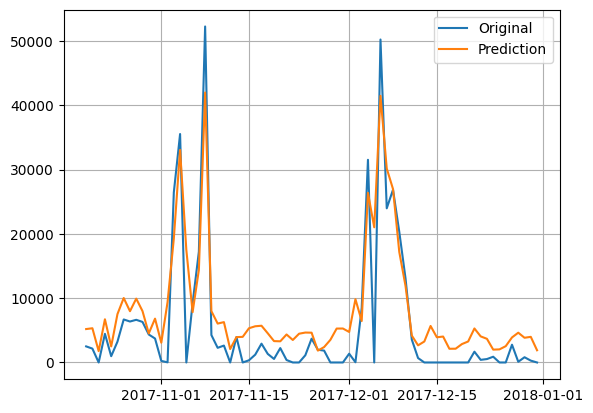

In [ ]:
plt.plot(forecast2['ds'], test_2['y'], label = 'Original')
plt.plot(forecast2['ds'], forecast2['yhat'], label = 'Prediction')
plt.grid()
plt.legend()

In [ ]:
print(mae(test_2['y'], forecast2['yhat']))

3715.9379128048918


## Deep Learning models

### LSTM

#### Data Wrangling for LSTMs

Before, we dive deep into the deep learning architectures, it is going to normalize data based on a MinMaxScaler. Considering the results of Prophet model, it is only be used "Radiation" and "Sunshine" for the prediction, but all columns are going to be normalized.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalers = {}
for col in list(df_h.columns):
  scaler = MinMaxScaler()
  scalers[col] = scaler
  df_h[col] = scaler.fit_transform(df_h[[col]])

In [ ]:
df_h.head()

,SystemProduction,WindSpeed,Sunshine,AirPressure,AirTemperature,RelativeAirHumidity,Radiation
Date,,,,,,,
2017-01-01,0.029186,0.205965,0.265182,0.446433,0.369083,0.510376,0.047298
2017-01-02,0.008457,0.220597,0.000000,0.640929,0.317510,0.851492,0.011620
2017-01-03,0.142227,0.245357,0.170040,0.114292,0.402736,0.799611,0.162129
2017-01-04,0.430295,0.189645,0.154858,0.431765,0.523666,0.916991,0.241985
2017-01-05,0.913707,0.142375,0.613360,0.715853,0.580848,0.470169,0.677596


Create a function to wrangle the data, in the format input needed for the LSTM.

In [ ]:
def create_sequences(data, target_column, seq_length):
    sequences = []
    targets = []

    # Obtener el índice de la columna objetivo
    target_index = data.columns.get_loc(target_column)

    for i in range(len(data) - seq_length + 1):
        # Extraer las secuencias de todas las columnas
        seq = data.iloc[i:i + seq_length, :].values
        # Obtener el valor de la columna objetivo para el próximo periodo
        target = data.iloc[i + seq_length - 1, target_index]

        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)

In [ ]:
X, Y = create_sequences(df_h[['SystemProduction', 'Sunshine', 'Radiation']], 'SystemProduction', 7)

In [ ]:
X.shape

(359, 7, 3)

In [ ]:
Y.shape

(359,)

#### Model creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Input

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
n = int(len(X)*0.8)

In [ ]:
X_train, X_test, Y_train, Y_test = X[:n], X[n:], Y[:n], Y[n:]

In [ ]:
X_train.shape

(287, 7, 3)

In [ ]:
model3 = Sequential()
model3.add(Input(shape = (7, 3)))
model3.add(LSTM(units = 50, activation = 'relu'))
model3.add(Flatten())
model3.add(Dense(20, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(loss = 'mae', optimizer = 'adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
cp_bm = ModelCheckpoint('best_model_lstm1.h5',
                             monitor='val_loss',  # Puedes cambiar a la métrica que prefieras
                             mode='min',  # 'min' si quieres minimizar la métrica, 'max' si quieres maximizarla
                             save_best_only=True,
                             verbose=1)

In [ ]:
model3.fit(X_train, Y_train, shuffle = True, batch_size = 32, epochs =  100, validation_split=0.1, callbacks=[cp_bm])

Epoch 1/100
1/9 [==>...........................] - ETA: 15s - loss: 0.2764
Epoch 1: val_loss improved from inf to 0.34308, saving model to best_model_lstm1.h5
9/9 [==============================] - 2s 41ms/step - loss: 0.2958 - val_loss: 0.3431
Epoch 2/100
1/9 [==>...........................] - ETA: 0s - loss: 0.3021
Epoch 2: val_loss improved from 0.34308 to 0.33500, saving model to best_model_lstm1.h5
9/9 [==============================] - 0s 11ms/step - loss: 0.2907 - val_loss: 0.3350
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2828
Epoch 3: val_loss improved from 0.33500 to 0.32338, saving model to best_model_lstm1.h5
9/9 [==============================] - 0s 13ms/step - loss: 0.2854 - val_loss: 0.3234
Epoch 4/100
1/9 [==>...........................] - ETA: 0s - loss: 0.3067
Epoch 4: val_loss improved from 0.32338 to 0.30568, saving model to best_model_lstm1.h5
9/9 [==============================] - 0s 13ms/step - loss: 0.2780 - val_loss: 0.3057
Epoch 5/100

See how it performs over the test dataset

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model3 = load_model('best_model_lstm1.h5')

In [ ]:
Y_pred = model3.predict(X_test)

3/3 [==============================] - 0s 5ms/step


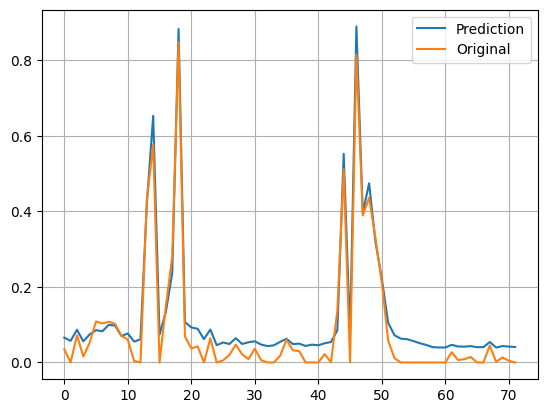

In [ ]:
plt.plot(Y_pred, label = 'Prediction')
plt.plot(Y_test, label = 'Original')
plt.grid()
plt.legend()

Rescale the prediction

In [ ]:
Y_test_re = scalers['SystemProduction'].inverse_transform(Y_test.reshape(-1,1))
Y_pred_re = scalers['SystemProduction'].inverse_transform(Y_pred)

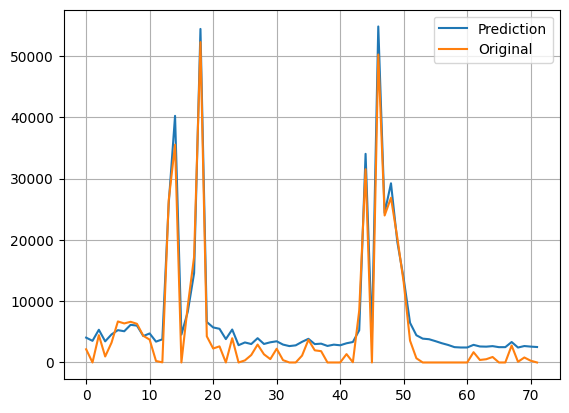

In [ ]:
plt.plot(Y_pred_re, label = 'Prediction')
plt.plot(Y_test_re, label = 'Original')
plt.grid()
plt.legend()

Calculate the MAE for the rescaled predictions

In [ ]:
print(mae(Y_test_re, Y_pred_re))

2267.0665874077695


### GRU Neural Network

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
model4 = Sequential()
model4.add(Input(shape = (7, 3)))
model4.add(GRU(units = 50, activation = 'relu'))
model4.add(Flatten())
model4.add(Dense(20, activation = 'relu'))
model4.add(Dense(1, activation = 'sigmoid'))

model4.compile(loss = 'mae', optimizer = 'adam')

In [ ]:
cp_bm4 = ModelCheckpoint('best_model_gru1.h5',
                             monitor='val_loss',  # Puedes cambiar a la métrica que prefieras
                             mode='min',  # 'min' si quieres minimizar la métrica, 'max' si quieres maximizarla
                             save_best_only=True,
                             verbose=1)

In [ ]:
model4.fit(X_train, Y_train, shuffle = True, batch_size = 32, epochs =  100, validation_split=0.1, callbacks=[cp_bm4])

Epoch 1/100
7/9 [======================>.......] - ETA: 0s - loss: 0.3001 
Epoch 1: val_loss improved from inf to 0.34142, saving model to best_model_gru1.h5
9/9 [==============================] - 3s 70ms/step - loss: 0.2962 - val_loss: 0.3414
Epoch 2/100
6/9 [===================>..........] - ETA: 0s - loss: 0.2922

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.34142 to 0.32463, saving model to best_model_gru1.h5
9/9 [==============================] - 0s 22ms/step - loss: 0.2881 - val_loss: 0.3246
Epoch 3/100
7/9 [======================>.......] - ETA: 0s - loss: 0.2740
Epoch 3: val_loss improved from 0.32463 to 0.30125, saving model to best_model_gru1.h5
9/9 [==============================] - 0s 18ms/step - loss: 0.2771 - val_loss: 0.3013
Epoch 4/100
6/9 [===================>..........] - ETA: 0s - loss: 0.2694
Epoch 4: val_loss improved from 0.30125 to 0.26576, saving model to best_model_gru1.h5
9/9 [==============================] - 0s 19ms/step - loss: 0.2627 - val_loss: 0.2658
Epoch 5/100
7/9 [======================>.......] - ETA: 0s - loss: 0.2477
Epoch 5: val_loss improved from 0.26576 to 0.21977, saving model to best_model_gru1.h5
9/9 [==============================] - 0s 18ms/step - loss: 0.2452 - val_loss: 0.2198
Epoch 6/100
7/9 [======================>.......] - ETA: 0s - loss: 0.2241
Epoch 6: va

See how it performs over the test dataset

In [ ]:
model4 = load_model('best_model_gru1.h5')

In [ ]:
Y_pred4 = model4.predict(X_test)

3/3 [==============================] - 0s 5ms/step


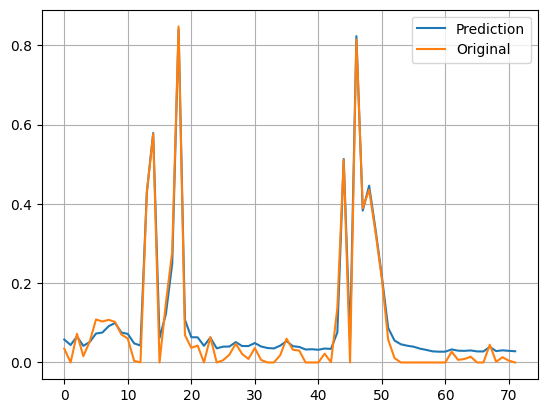

In [ ]:
plt.plot(Y_pred4, label = 'Prediction')
plt.plot(Y_test, label = 'Original')
plt.grid()
plt.legend()

Rescale the prediction

In [ ]:
Y_test_re4 = scalers['SystemProduction'].inverse_transform(Y_test.reshape(-1,1))
Y_pred_re4 = scalers['SystemProduction'].inverse_transform(Y_pred4)

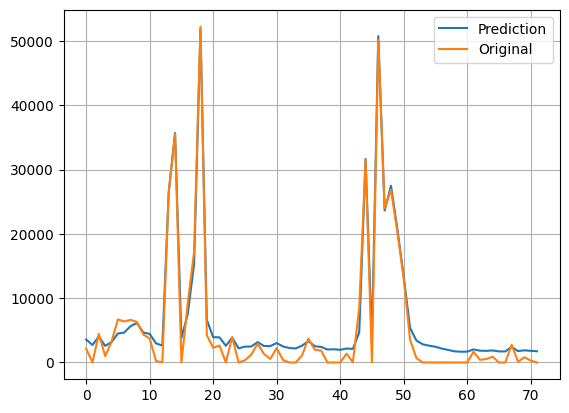

In [ ]:
plt.plot(Y_pred_re4, label = 'Prediction')
plt.plot(Y_test_re4, label = 'Original')
plt.grid()
plt.legend()

Calculate the MAE for the rescaled predictions

In [ ]:
print(mae(Y_test_re4, Y_pred_re4))

1487.8228867974176


### Convolutional Neural Network

In [ ]:
from tensorflow.keras.layers import Conv1D

In [ ]:
model5 = Sequential()
model5.add(Input(shape = (7, 3)))
model5.add(GRU(units = 50, activation = 'relu'))
model5.add(Flatten())
model5.add(Dense(20, activation = 'relu'))
model5.add(Dense(1, activation = 'sigmoid'))

model5.compile(loss = 'mae', optimizer = 'adam')

In [ ]:
cp_bm5 = ModelCheckpoint('best_model_conv_1d_1.h5',
                             monitor='val_loss',  # Puedes cambiar a la métrica que prefieras
                             mode='min',  # 'min' si quieres minimizar la métrica, 'max' si quieres maximizarla
                             save_best_only=True,
                             verbose=1)

In [ ]:
model5.fit(X_train, Y_train, shuffle = True, batch_size = 32, epochs =  100, validation_split=0.1, callbacks=[cp_bm5])

Epoch 1/100
1/9 [==>...........................] - ETA: 13s - loss: 0.2860
Epoch 1: val_loss improved from inf to 0.33999, saving model to best_model_conv_1d_1.h5
9/9 [==============================] - 2s 45ms/step - loss: 0.2981 - val_loss: 0.3400
Epoch 2/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2377
Epoch 2: val_loss improved from 0.33999 to 0.32918, saving model to best_model_conv_1d_1.h5
9/9 [==============================] - 0s 11ms/step - loss: 0.2925 - val_loss: 0.3292
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 0.3419
Epoch 3: val_loss improved from 0.32918 to 0.31214, saving model to best_model_conv_1d_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 11ms/step - loss: 0.2854 - val_loss: 0.3121
Epoch 4/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2554
Epoch 4: val_loss improved from 0.31214 to 0.28560, saving model to best_model_conv_1d_1.h5
9/9 [==============================] - 0s 11ms/step - loss: 0.2738 - val_loss: 0.2856
Epoch 5/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2379
Epoch 5: val_loss improved from 0.28560 to 0.24681, saving model to best_model_conv_1d_1.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2582 - val_loss: 0.2468
Epoch 6/100
9/9 [==============================] - ETA: 0s - loss: 0.2392
Epoch 6: val_loss improved from 0.24681 to 0.21581, saving model to best_model_conv_1d_1.h5
9/9 [==============================] - 0s 13ms/step - loss: 0.2392 - val_loss: 0.2158
Epoch 7/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2517
Epoch 7: val_loss improved from 0.21581 to 0.16415, saving model to best_model_conv_

See how it performs over the test dataset

In [ ]:
model5 = load_model('best_model_conv_1d_1.h5')

In [ ]:
Y_pred5 = model5.predict(X_test)

3/3 [==============================] - 0s 4ms/step


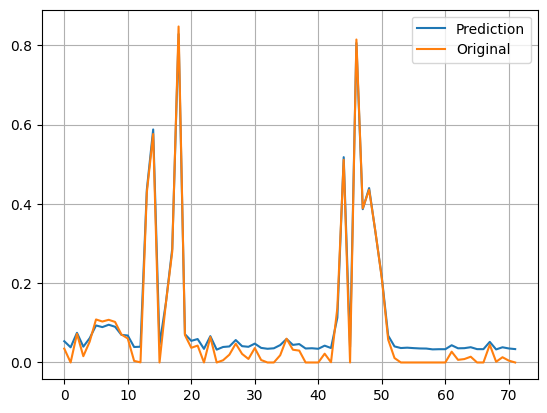

In [ ]:
plt.plot(Y_pred5, label = 'Prediction')
plt.plot(Y_test, label = 'Original')
plt.grid()
plt.legend()

Rescale the prediction

In [ ]:
Y_test_re5 = scalers['SystemProduction'].inverse_transform(Y_test.reshape(-1,1))
Y_pred_re5 = scalers['SystemProduction'].inverse_transform(Y_pred5)

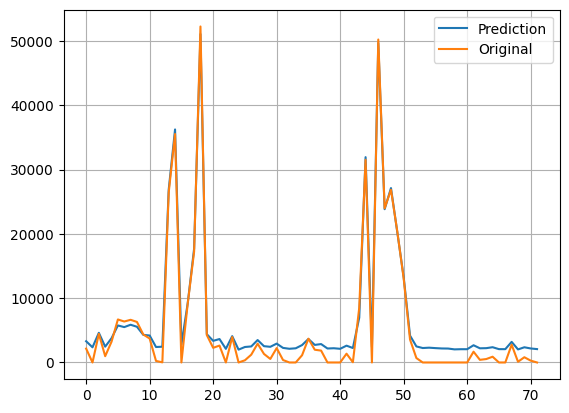

In [ ]:
plt.plot(Y_pred_re5, label = 'Prediction')
plt.plot(Y_test_re5, label = 'Original')
plt.grid()
plt.legend()

Calculate the MAE for the rescaled predictions

In [ ]:
print(mae(Y_test_re5, Y_pred_re5))

1344.043274069553


# Modeling as Univariate Forecasting

## Prophet

In [ ]:
df_h['SP_re'] = scalers['SystemProduction'].inverse_transform(df_h[['SystemProduction']])

In [ ]:
data_p = df_h[['SP_re']]

In [ ]:
data_p = data_p.reset_index().rename(columns = {'Date': 'ds', 'SP_re' : 'y'})

Split data for train and test

In [ ]:
data_p.shape

(365, 2)

In [ ]:
n = int(len(data_p)*0.8)
train = data_p[:n]
test = data_p[n:]

Define the model

In [ ]:
model = Prophet()

Train the model

In [ ]:
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/bhkc610v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg74n3tuy/k8p_8m2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84247', 'data', 'file=/tmp/tmpg74n3tuy/bhkc610v.json', 'init=/tmp/tmpg74n3tuy/k8p_8m2i.json', 'output', 'file=/tmp/tmpg74n3tuy/prophet_modelr187ke1c/prophet_model-20231119170208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:02:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:02:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(test.drop(['y'], axis = 1))

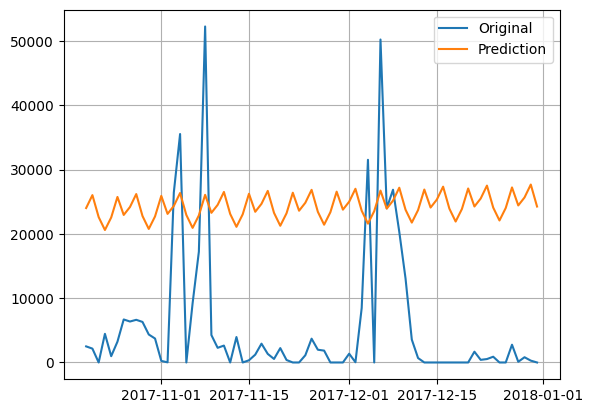

In [ ]:
plt.plot(forecast['ds'], test['y'], label = 'Original')
plt.plot(forecast['ds'], forecast['yhat'], label = 'Prediction')
plt.grid()
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
print(mae(test['y'], forecast['yhat']))

20722.61556703624


As univariate time-series, Prophet cannot predict the behaviour of the time series. What might it happen with the LSTM, GRU or Conv1D?

## Deep Learning models

### Data Creation

In [ ]:
X, Y = create_sequences(df_h[['SystemProduction']], 'SystemProduction', 7)

In [ ]:
X.shape

(359, 7, 1)

In [ ]:
Y.shape

(359,)

#### Model creation

In [ ]:
n = int(len(X)*0.8)

In [ ]:
X_train, X_test, Y_train, Y_test = X[:n], X[n:], Y[:n], Y[n:]

In [ ]:
X_train.shape

(287, 7, 1)

#### LSTM

In [ ]:
model6 = Sequential()
model6.add(Input(shape = (7, 1)))
model6.add(LSTM(units = 50, activation = 'relu'))
model6.add(Flatten())
model6.add(Dense(20, activation = 'relu'))
model6.add(Dense(1, activation = 'sigmoid'))

model6.compile(loss = 'mae', optimizer = 'adam')

In [ ]:
cp_bm6 = ModelCheckpoint('best_model_lstm2.h5',
                             monitor='val_loss',  # Puedes cambiar a la métrica que prefieras
                             mode='min',  # 'min' si quieres minimizar la métrica, 'max' si quieres maximizarla
                             save_best_only=True,
                             verbose=1)

In [ ]:
model6.fit(X_train, Y_train, shuffle = True, batch_size = 32, epochs =  100, validation_split=0.1, callbacks=[cp_bm6])

Epoch 1/100
1/9 [==>...........................] - ETA: 12s - loss: 0.3274
Epoch 1: val_loss improved from inf to 0.34501, saving model to best_model_lstm2.h5
9/9 [==============================] - 2s 43ms/step - loss: 0.2968 - val_loss: 0.3450
Epoch 2/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2911
Epoch 2: val_loss improved from 0.34501 to 0.34022, saving model to best_model_lstm2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2935 - val_loss: 0.3402
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2868

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 0.34022 to 0.33056, saving model to best_model_lstm2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2901 - val_loss: 0.3306
Epoch 4/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2435
Epoch 4: val_loss improved from 0.33056 to 0.31374, saving model to best_model_lstm2.h5
9/9 [==============================] - 0s 11ms/step - loss: 0.2846 - val_loss: 0.3137
Epoch 5/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2761
Epoch 5: val_loss improved from 0.31374 to 0.29962, saving model to best_model_lstm2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2781 - val_loss: 0.2996
Epoch 6/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2899
Epoch 6: val_loss improved from 0.29962 to 0.27375, saving model to best_model_lstm2.h5
9/9 [==============================] - 0s 11ms/step - loss: 0.2702 - val_loss: 0.2738
Epoch 7/100
9/9 [==============================] - ETA: 0s - loss: 0.2577
Epoch 7

See how it performs over the test dataset

In [ ]:
model6 = load_model('best_model_lstm2.h5')

In [ ]:
Y_pred6 = model6.predict(X_test)

3/3 [==============================] - 0s 7ms/step


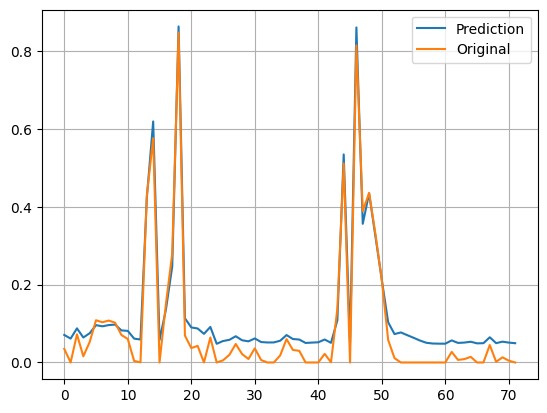

In [ ]:
plt.plot(Y_pred6, label = 'Prediction')
plt.plot(Y_test, label = 'Original')
plt.grid()
plt.legend()

Rescale the prediction

In [ ]:
Y_test_re6 = scalers['SystemProduction'].inverse_transform(Y_test.reshape(-1,1))
Y_pred_re6 = scalers['SystemProduction'].inverse_transform(Y_pred6)

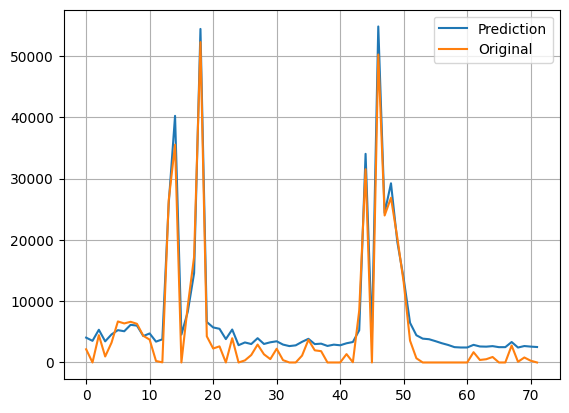

In [ ]:
plt.plot(Y_pred_re, label = 'Prediction')
plt.plot(Y_test_re, label = 'Original')
plt.grid()
plt.legend()

Calculate the MAE for the rescaled predictions

In [ ]:
print(mae(Y_test_re6, Y_pred_re6))

2359.474326708985


#### GRU

In [ ]:
model7 = Sequential()
model7.add(Input(shape = (7, 1)))
model7.add(GRU(units = 50, activation = 'relu'))
model7.add(Flatten())
model7.add(Dense(20, activation = 'relu'))
model7.add(Dense(1, activation = 'sigmoid'))

model7.compile(loss = 'mae', optimizer = 'adam')

In [ ]:
cp_bm7 = ModelCheckpoint('best_model_gru2.h5',
                             monitor='val_loss',  # Puedes cambiar a la métrica que prefieras
                             mode='min',  # 'min' si quieres minimizar la métrica, 'max' si quieres maximizarla
                             save_best_only=True,
                             verbose=1)

In [ ]:
model7.fit(X_train, Y_train, shuffle = True, batch_size = 32, epochs =  100, validation_split=0.1, callbacks=[cp_bm7])

Epoch 1/100
1/9 [==>...........................] - ETA: 14s - loss: 0.2692
Epoch 1: val_loss improved from inf to 0.34333, saving model to best_model_gru2.h5
9/9 [==============================] - 2s 44ms/step - loss: 0.2958 - val_loss: 0.3433
Epoch 2/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2662
Epoch 2: val_loss improved from 0.34333 to 0.32968, saving model to best_model_gru2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2898 - val_loss: 0.3297
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2985

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 0.32968 to 0.31326, saving model to best_model_gru2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2823 - val_loss: 0.3133
Epoch 4/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2631
Epoch 4: val_loss improved from 0.31326 to 0.29274, saving model to best_model_gru2.h5
9/9 [==============================] - 0s 11ms/step - loss: 0.2724 - val_loss: 0.2927
Epoch 5/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2461
Epoch 5: val_loss improved from 0.29274 to 0.26681, saving model to best_model_gru2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2603 - val_loss: 0.2668
Epoch 6/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2562
Epoch 6: val_loss improved from 0.26681 to 0.23203, saving model to best_model_gru2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2464 - val_loss: 0.2320
Epoch 7/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2457
Epoch 7: va

See how it performs over the test dataset

In [ ]:
model7 = load_model('best_model_gru2.h5')

In [ ]:
Y_pred7 = model7.predict(X_test)

3/3 [==============================] - 0s 6ms/step


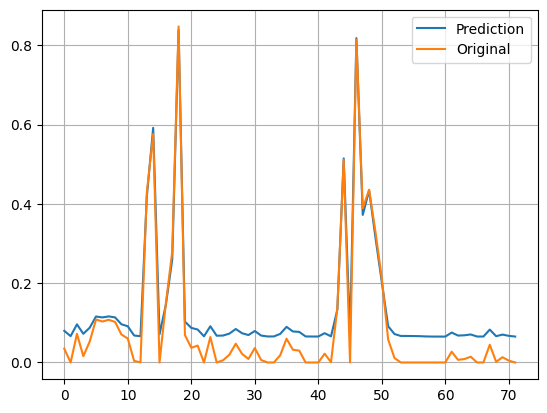

In [ ]:
plt.plot(Y_pred7, label = 'Prediction')
plt.plot(Y_test, label = 'Original')
plt.grid()
plt.legend()

Rescale the prediction

In [ ]:
Y_test_re7 = scalers['SystemProduction'].inverse_transform(Y_test.reshape(-1,1))
Y_pred_re7 = scalers['SystemProduction'].inverse_transform(Y_pred7)

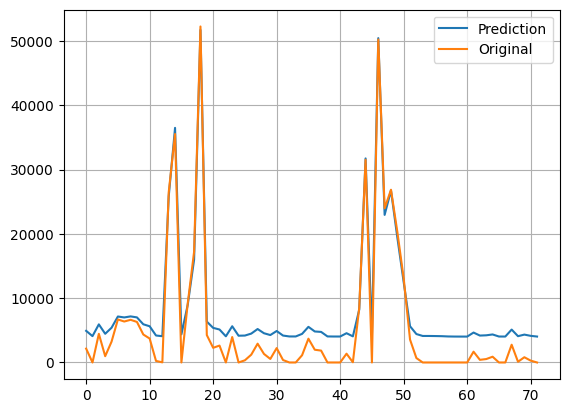

In [ ]:
plt.plot(Y_pred_re7, label = 'Prediction')
plt.plot(Y_test_re7, label = 'Original')
plt.grid()
plt.legend()

Calculate the MAE for the rescaled predictions

In [ ]:
print(mae(Y_test_re7, Y_pred_re7))

2779.6227580403647


#### Conv1D

In [ ]:
model8 = Sequential()
model8.add(Input(shape = (7, 1)))
model8.add(GRU(units = 50, activation = 'relu'))
model8.add(Flatten())
model8.add(Dense(20, activation = 'relu'))
model8.add(Dense(1, activation = 'sigmoid'))

model8.compile(loss = 'mae', optimizer = 'adam')

In [ ]:
cp_bm8 = ModelCheckpoint('best_model_conv_1d_2.h5',
                             monitor='val_loss',  # Puedes cambiar a la métrica que prefieras
                             mode='min',  # 'min' si quieres minimizar la métrica, 'max' si quieres maximizarla
                             save_best_only=True,
                             verbose=1)

In [ ]:
model8.fit(X_train, Y_train, shuffle = True, batch_size = 32, epochs =  100, validation_split=0.1, callbacks=[cp_bm8])

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 0.2951 
Epoch 1: val_loss improved from inf to 0.34042, saving model to best_model_conv_1d_2.h5
9/9 [==============================] - 2s 43ms/step - loss: 0.2951 - val_loss: 0.3404
Epoch 2/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2789
Epoch 2: val_loss improved from 0.34042 to 0.32332, saving model to best_model_conv_1d_2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2866 - val_loss: 0.3233
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2548

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 0.32332 to 0.29673, saving model to best_model_conv_1d_2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2751 - val_loss: 0.2967
Epoch 4/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2673
Epoch 4: val_loss improved from 0.29673 to 0.25649, saving model to best_model_conv_1d_2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2612 - val_loss: 0.2565
Epoch 5/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2593
Epoch 5: val_loss improved from 0.25649 to 0.20549, saving model to best_model_conv_1d_2.h5
9/9 [==============================] - 0s 11ms/step - loss: 0.2406 - val_loss: 0.2055
Epoch 6/100
1/9 [==>...........................] - ETA: 0s - loss: 0.2184
Epoch 6: val_loss improved from 0.20549 to 0.14480, saving model to best_model_conv_1d_2.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.2214 - val_loss: 0.1448
Epoch 7/100
8/9 [=========================>....] - ETA: 0s - loss

See how it performs over the test dataset

In [ ]:
model8 = load_model('best_model_conv_1d_2.h5')

In [ ]:
Y_pred8 = model8.predict(X_test)

3/3 [==============================] - 0s 6ms/step


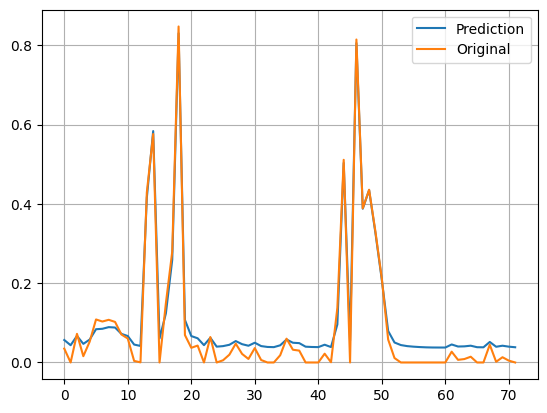

In [ ]:
plt.plot(Y_pred8, label = 'Prediction')
plt.plot(Y_test, label = 'Original')
plt.grid()
plt.legend()

Rescale the prediction

In [ ]:
Y_test_re8 = scalers['SystemProduction'].inverse_transform(Y_test.reshape(-1,1))
Y_pred_re8 = scalers['SystemProduction'].inverse_transform(Y_pred8)

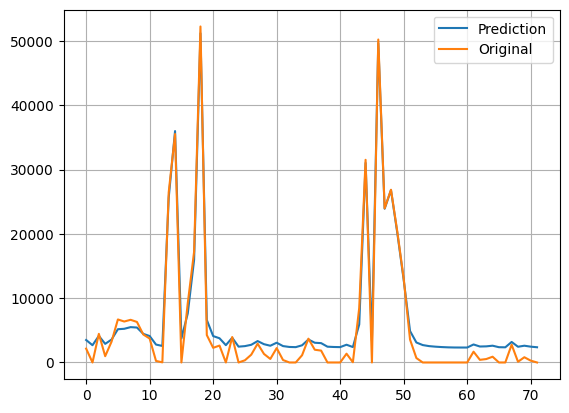

In [ ]:
plt.plot(Y_pred_re8, label = 'Prediction')
plt.plot(Y_test_re8, label = 'Original')
plt.grid()
plt.legend()

Calculate the MAE for the rescaled predictions

In [ ]:
print(mae(Y_test_re8, Y_pred_re8))

1642.052940782335
